# Pmod TC1 Sensor demonstration

This demonstration shows how to use the Pmod TC1.

The Pmod TC1 is required in this example. A K-Type thermocouple wire needs to be attached onto the screw terminal. The polarity of the thermocouple matters, therefore it is required to have the wires screwed down into the right orientation for accurate temperature readings. The device measures the difference in temperature between the two ends of the thermocouple, of which
one is the internal temperature and serves as the reference junction.

### 1. Read the current temperature

In [1]:
from pynq import Overlay
Overlay("base.bit").download()

In [2]:
from pynq.iop import Pmod_TC1
from pynq.iop import PMODB

my_tc1 = Pmod_TC1(PMODB)
r = my_tc1.read()
print('Ref Junction Temp:  {0:.2f} C'.format(my_tc1.reg_to_ref(r)))
print('Thermocouple Temp:  {0:.2f} C'.format(my_tc1.reg_to_tc(r)))
print('Alarm flags:        {}'.format(hex(my_tc1.reg_to_alarms(r))))

Ref Junction Temp:  28.06 C
Thermocouple Temp:  24.50 C
Alarm flags:        0x0


### 2. Starting logging temperature
The thermocouple sensor is initialized and set to log a reading every 1 second. The temperature of the sensor
can be changed by touching it with warm fingers or by blowing on it.

In [3]:
my_tc1.start_log()

### 3. Modifying the temperture

* Touch the thermocouple with warm fingers; or
* Blow on the thermocouple with cool air

Stop the logging whenever you are finished trying to change the sensor's value.

In [4]:
my_tc1.stop_log()
log = my_tc1.get_log()

### 4. Plot values over time

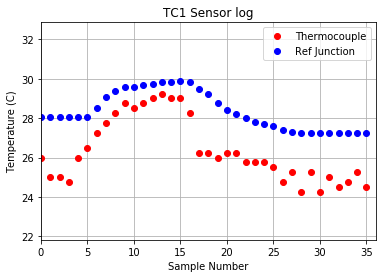

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
tc = [my_tc1.reg_to_tc(v) for v in log]
ref = [my_tc1.reg_to_ref(v) for v in log]
plt.plot(range(len(tc)), tc, 'ro', label='Thermocouple')
plt.plot(range(len(ref)), ref, 'bo', label='Ref Junction')
plt.title('TC1 Sensor log')
plt.axis([0, len(log), min(tc+ref)*0.9, max(tc+ref)*1.1])
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Temperature (C)')
plt.grid()
plt.show()